## Dataset Introduction

This project uses a Credit Risk dataset containing customer demographic, financial, and loan-related information.  
The dataset is designed to analyze borrower behavior and identify factors that influence loan default.

It includes features such as age, annual income, employment length, loan amount, loan grade, interest rate, loan persent income.  
The target variable `loan_status` indicates whether a borrower successfully repaid the loan or defaulted.


## Business Problem & Key Questions

Financial institutions face significant losses due to loan defaults.  
The objective of this project is to analyze customer and loan data to identify key factors that influence loan default and help improve credit risk assessment.

### Key Questions
- Which customer and loan characteristics are most associated with loan default?
- Does higher loan-to-income ratio increase the likelihood of default?
- How does loan grade affect default risk?
- Are larger loan amounts associated with higher default rates?

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [11]:
#Load dataset 
df = pd.read_csv('credit_risk_dataset.csv')
#Dataset sourced from Kaggle – Credit Risk Dataset

In [ ]:
#Show top 5 records
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Feature Explanation – loan_percent_income

`loan_percent_income` represents the proportion of a customer's annual income that is allocated to loan repayment.

It is calculated as:

Loan Amount / Annual Income


In [ ]:
#To show total numbers of rows and coluumns
df.shape

(32581, 12)

In [ ]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Target Variable Description

The objective of this analysis is to understand factors influencing loan default.

**Target Variable – loan_status**
- 0 → Non-Default (Customer repaid the loan successfully)
- 1 → Default (Customer failed to repay the loan)



In [ ]:
#To show the diamensions of the dataset
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.768880,9593.845632,11.014662,0.218688,0.170250
std,6.354100,6.201558e+04,4.090411,6322.730241,3.083050,0.413363,0.106812
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000


## Data Cleaning

In [16]:
#Checked duplicate values
df.duplicated().sum()

np.int64(165)

In [17]:
#drop duplicate values
df.drop_duplicates(inplace = True,keep = 'first')

In [18]:
df.duplicated().sum()


np.int64(0)

`Drop all duplicate records`

In [20]:
#Check null values
df.isnull().sum().sort_values(ascending = False)

loan_int_rate                 3095
person_emp_length              887
person_income                    0
person_age                       0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [21]:
#Fill null values using median and mode
for col in df.select_dtypes(include = np.number):
    df[col].fillna(df[col].median(),inplace = True) #Median is robust and does not get affected by extreme values in numerical columns.
    
for col in df.select_dtypes(include = "object"):
    df[col].fillna(df[col].mode()[0],inplace = True) #Mode use for categorical columns.

In [22]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

`Remove all null values`

In [31]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55


In [ ]:
#Drop the unwanted columns

df.drop('cb_person_default_on_file',axis=1,inplace = True)
df.drop('cb_person_cred_hist_length',axis=1,inplace = True)

In [33]:
#Check the values of defaulters and non defaulters customer in percentage
#0 → Non-Default (Customer repaid the loan successfully)
#1 → Default (Customer failed to repay the loan)
df['loan_status'].value_counts(normalize = True)*100

loan_status
0    78.13117
1    21.86883
Name: proportion, dtype: float64

### Observation
- Approximately 78% of customers are non-defaulters, while 22% have defaulted on their loans, indicating a moderately imbalanced dataset.

In [34]:
#To check how many columns have numeric and categorical in dataset.
numeric_features = [feature for feature in df.columns if df[feature].dtypes !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes =='O']



In [35]:
print("We have {} numeric feature :{}".format(len(numeric_features),numeric_features))
print("We have {} categorical feature :{}".format(len(categorical_features),categorical_features))

We have 7 numeric feature :['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income']
We have 3 categorical feature :['person_home_ownership', 'loan_intent', 'loan_grade']


## EDA

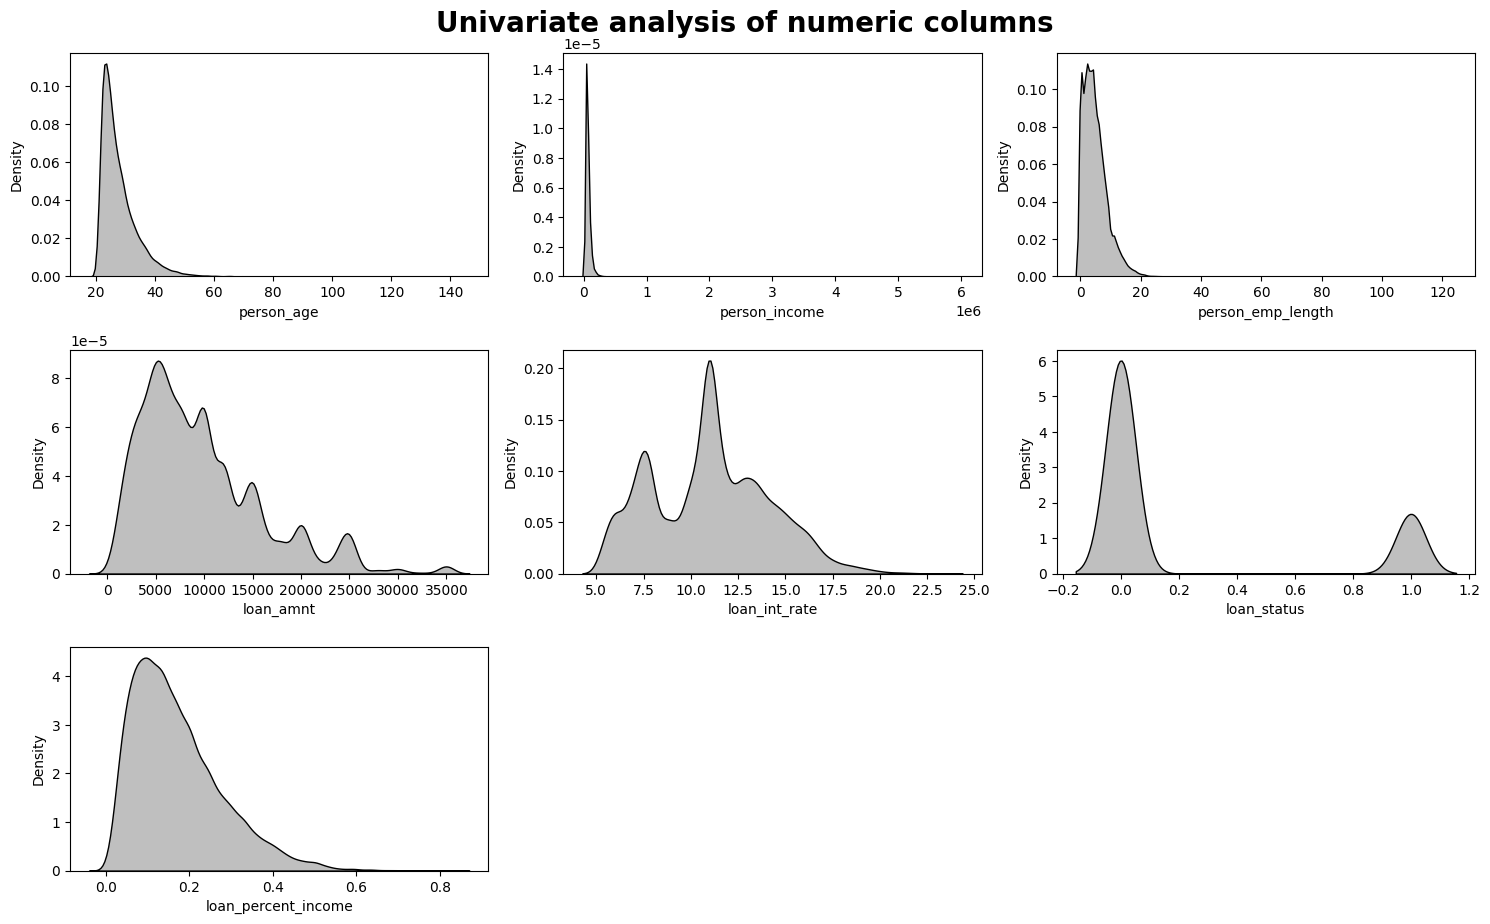

In [60]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate analysis of numeric columns',fontsize = 20,fontweight = 'bold')
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df[numeric_features[i]],shade = True,color = 'Black')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

### Observation :-
- person age - The distribution is right skewed.Most applicants are young(20-40).very few applicant above 60 years.
- person income - Strong right skew.Majority of people fall in the lower–middle income range.
- loan amnt - Distribution is right-skewed.Most loans are of small to medium amounts.
- loan percent income - Most values are close to 0.Few people allocate a large percentage of income to loans.





## Bivariate analysis

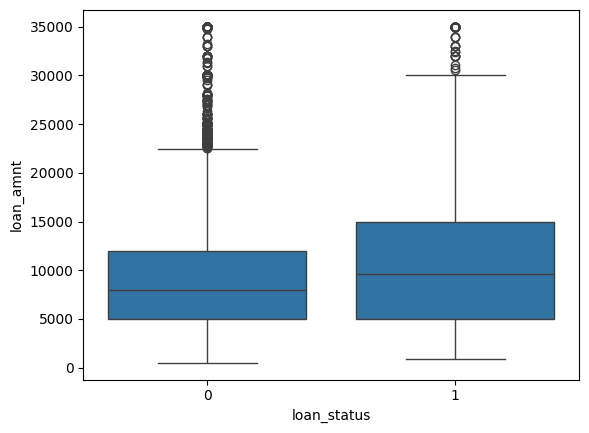

In [37]:
#Loan amount Vs Loan status
sns.boxplot(x = 'loan_status',y ='loan_amnt',data = df )
plt.show()

### Observations:- 
- Customers with loan_status - 1 (default) generally have higher loan amounts,indicating that larger loans increase repayment pressure and default risk.

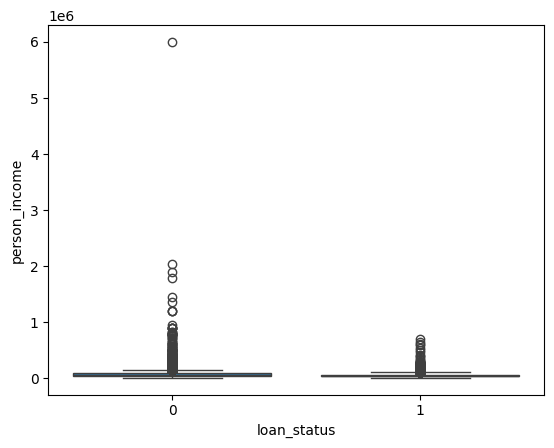

In [38]:
#Person income Vs Loan status
sns.boxplot(x = 'loan_status',y= 'person_income',data = df)
plt.show()

### Observation:- 
- Defaulters tend to have lower median income compared to non-defaulters.

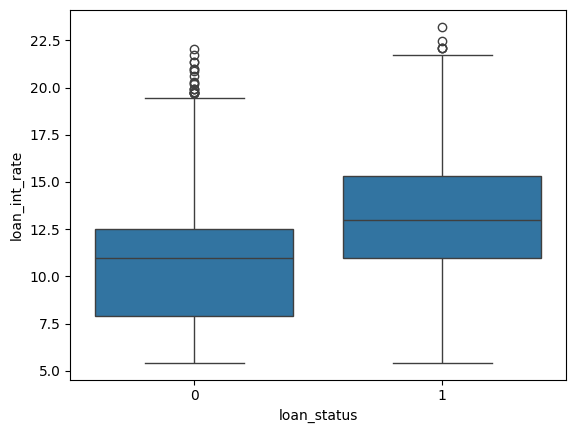

In [39]:
#Loan interest rate Vs Loan status
sns.boxplot(x = 'loan_status',y= 'loan_int_rate',data = df)
plt.show()

### Observations :- 
- Higher interest rates are associated with a greater likelihood of default.

In [41]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55


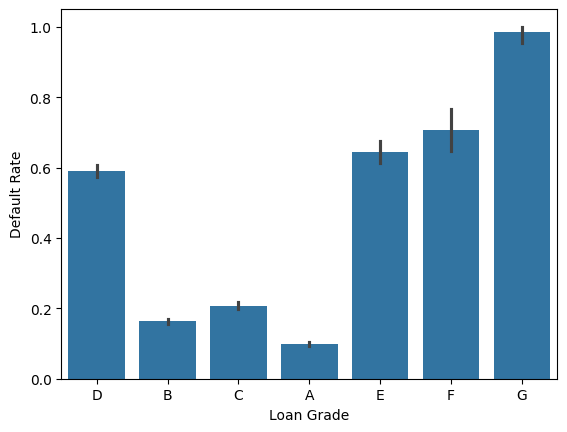

In [ ]:
#loan grade Vs loan status
sns.barplot(
    x='loan_grade',
    y='loan_status',
    data=df
)
plt.ylabel("Default Rate")
plt.xlabel("Loan Grade")
plt.show()


### Insights
- The analysis shows that lower loan grades are associated with higher default rates, while higher grades have lower default probability. This confirms that loan grade is a strong predictor of credit risk.

## Trivariate Analysis

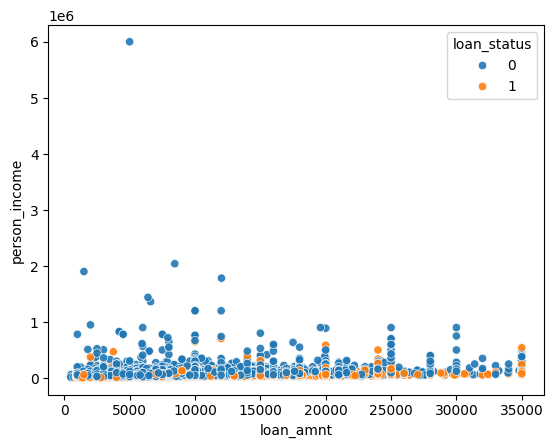

In [5]:
sns.scatterplot(x = 'loan_amnt',y = 'person_income',hue = 'loan_status',alpha = 0.9,data = df)
plt.show()

### Observations :- 
- Defaults are concentrated among customers with lower income and higher loan amounts, indicating financial stress.

## Outlier Detection Using Box Plot

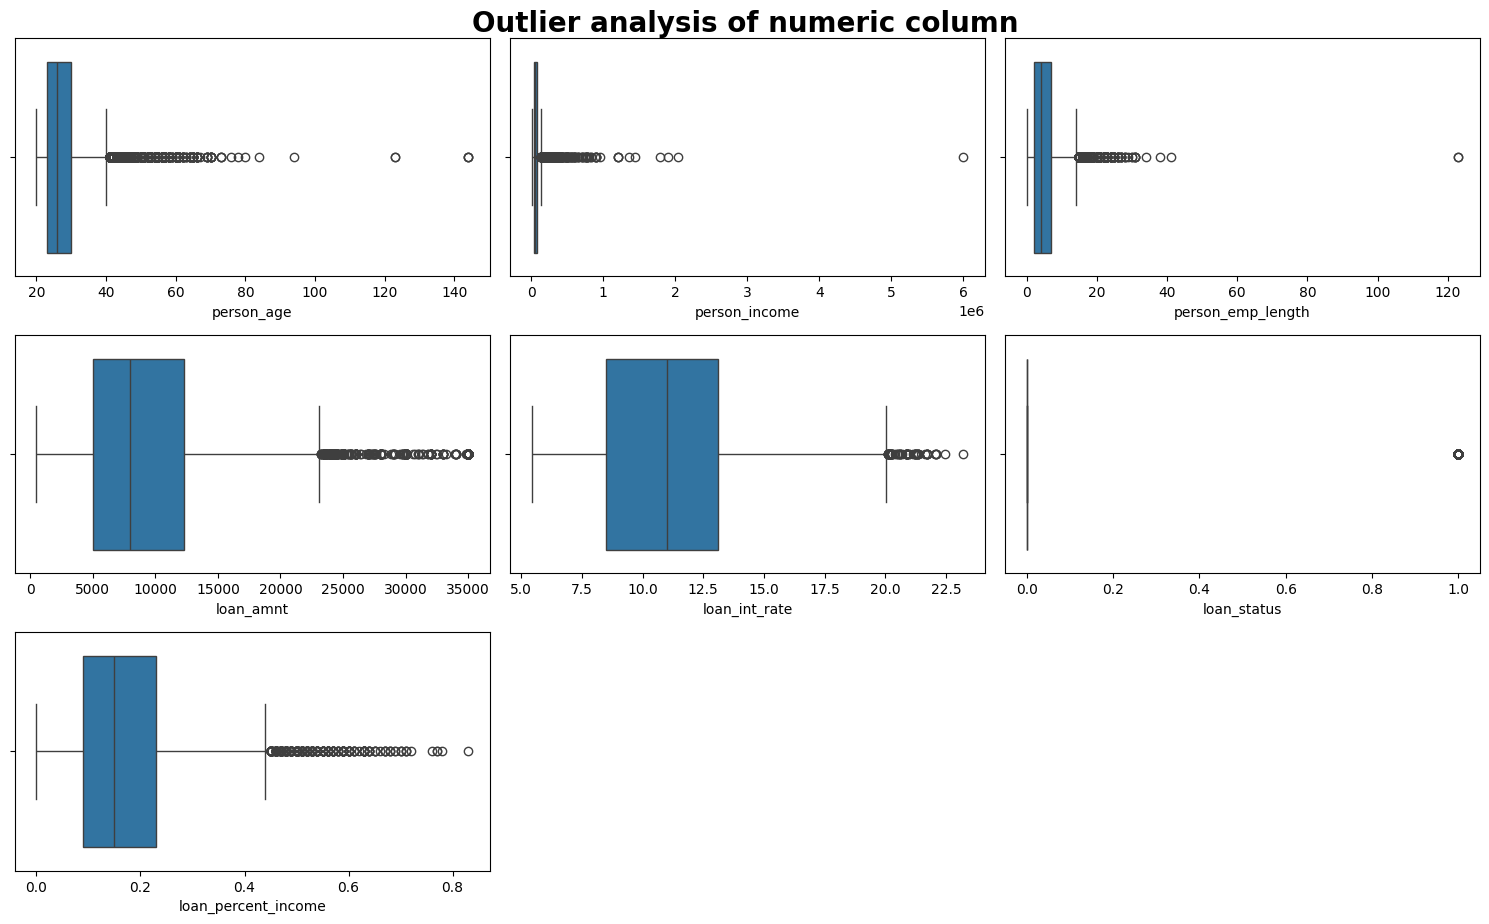

In [29]:
plt.figure(figsize = (15,15))
plt.suptitle('Outlier analysis of numeric column',fontsize = 20,fontweight = 'bold')
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()
    


### Observations:-
- Person_Income :- The distribution is with several high value outliers,representing high income customer
- Loan_Amount :- The distribution is show high value outliers,indicating customers with large loan exposure.these are valid and important from a credit risk perspective
- loan_int_rate :- it contains a few extreme values, which may increase repayment burden and default risk.

## Correlation Heatmap of Numerical Features

In [30]:
num_df = df.select_dtypes(include = ['int64','float64'])
corr_matrix = num_df.corr()


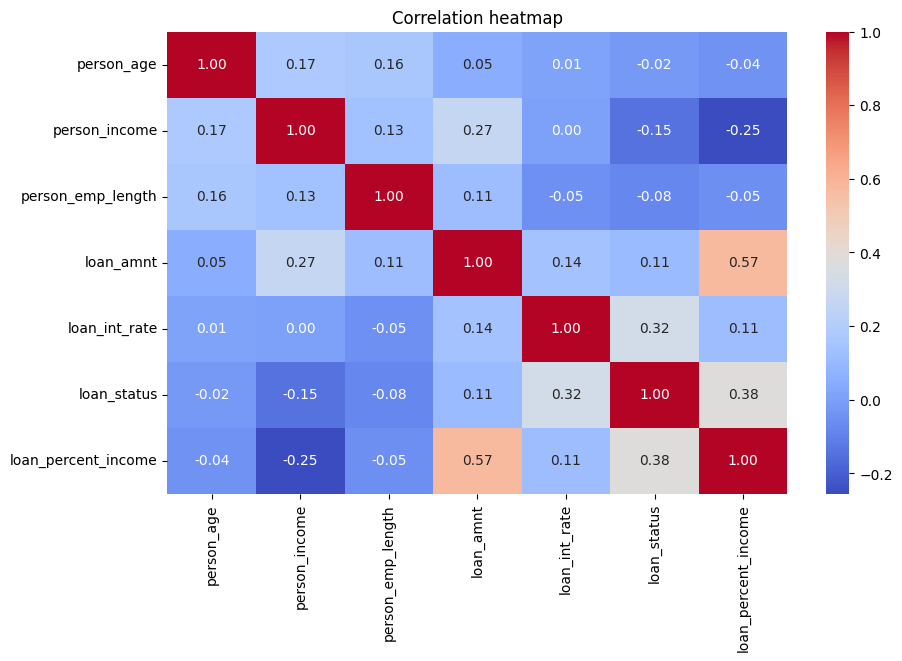

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot = True,fmt = '.2f',cmap = 'coolwarm')
plt.title('Correlation heatmap')
plt.show()

### Observations
- loan_percent_income shows strong positive correlation with loan_status, indicating higher repayment burden increases default risk.

- Interest rate is moderately positively correlated with default, suggesting higher rates increase repayment stress.

- Income has a negative correlation with default, meaning higher-income customers are less likely to default.

## EDA Conclusion

- Customers with low income and high loan-to-income ratio are more likely to default  
- Higher loan amounts and interest rates increase repayment stress  
- Credit history is a strong predictor of loan default  
- Loan grade effectively captures default risk  



## Final Conclusion

The analysis reveals several key customer and loan characteristics that are strongly associated with loan default.

Customers with a **higher loan-to-income ratio (`loan_percent_income`)** show a significantly higher likelihood of default, indicating that repayment burden is a critical risk factor.  
As the proportion of income allocated to loan repayment increases, customers experience greater financial stress, leading to higher default probability.

**Loan grade** plays a major role in determining default risk.  
Lower loan grades are associated with substantially higher default rates, while higher grades show improved repayment behavior. This confirms that loan grading is an effective mechanism for credit risk segmentation.

**Loan amount** also influences default behavior.  
Larger loan amounts tend to be associated with higher default rates, particularly when combined with lower income levels, as higher debt exposure increases repayment difficulty.

Overall, the results indicate that **repayment capacity, loan quality, and debt size** are the most influential factors in loan default.  
These insights can help financial institutions strengthen credit assessment processes, reduce default rates, and make more informed lending decisions.
